# HW5

# 2.Alef

In [ ]:
%cd 'drive/MyDrive/DIP/'

/content/drive/MyDrive/DIP


In [1]:
!pwd

/content


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
import skimage.metrics

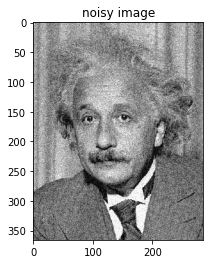

In [ ]:
noisyimg = cv2.imread("NoisyIMG.jpg" , 0)
real = cv2.imread("realimg.jpg" , cv2.IMREAD_GRAYSCALE) 
plt.title("noisy image")
plt.imshow(noisyimg , cmap='gray')

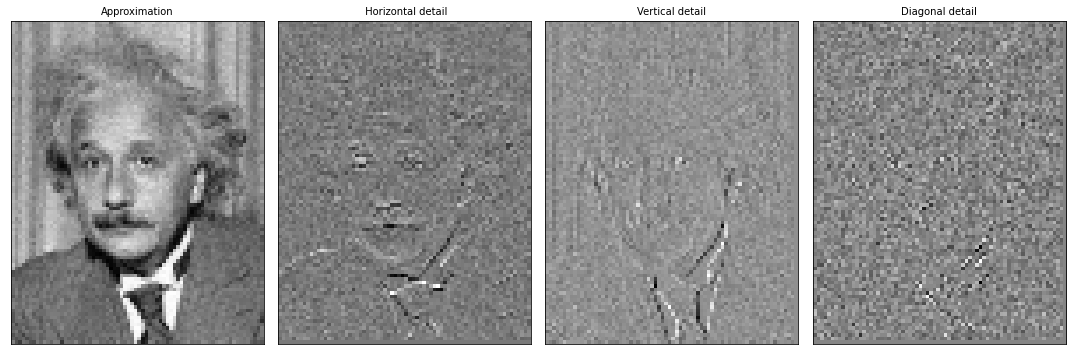

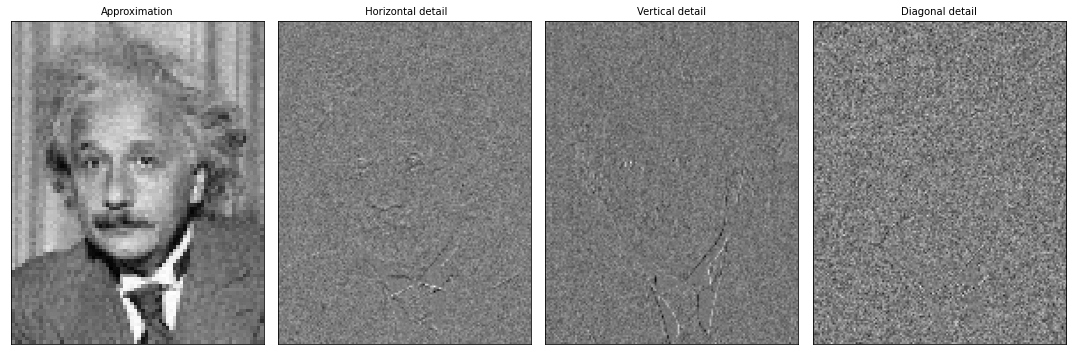

In [ ]:
# decompose by haar wavelet functions 
wavelet = 'haar'
scales = 2
ceofficients = pywt.wavedec2(noisyimg, wavelet, level=scales)
LL , (LH2, HL2, HH2) , (LH1, HL1, HH1) = ceofficients # the output is a list of approximation and details
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
          
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
for i, a in enumerate([LL, LH2, HL2, HH2]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
for i, a in enumerate([LL, LH1, HL1, HH1]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

# 2.b

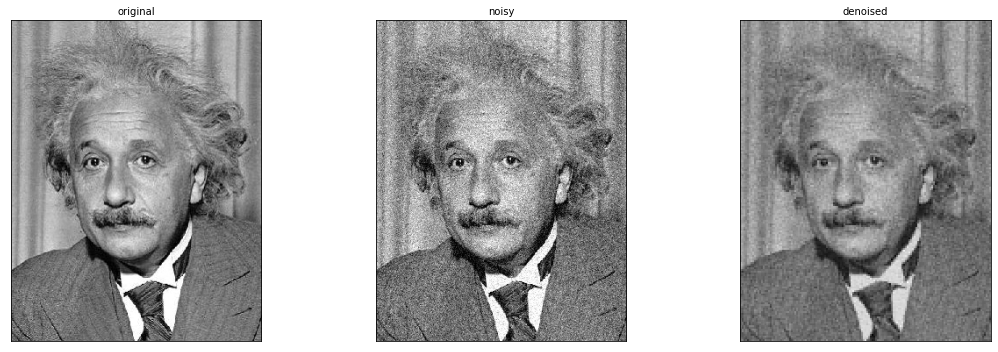

In [ ]:
# remove H, V ,D
# LH2_new = np.zeros_like(LH2)
# HL2_new = np.zeros_like(HL2)
HH2_new = np.zeros_like(HH2)
LH1_new = np.zeros_like(LH1)
HL1_new = np.zeros_like(HL1)
HH1_new = np.zeros_like(HH1)

ceofficients = [LL , (LH2, HL2, HH2_new) , (LH1_new, HL1_new, HH1_new)]
# denoising
denoisedimg = pywt.waverec2(ceofficients, wavelet) # reconstruct the image to the original domain #

titles = ['original','noisy', 'denoised','median_filter']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
for i, a in enumerate([real, noisyimg, denoisedimg]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

# 2.c

In [ ]:
# evaluate your try here
mse = skimage.metrics.mean_squared_error(real , denoisedimg)
print("MSE : " , mse)
psnr = skimage.metrics.peak_signal_noise_ratio(real , denoisedimg)
print("PSNR : " , psnr)
ssim = skimage.metrics.structural_similarity(real , denoisedimg)
print("SSIM : " , ssim)

MSE :  338.1450201096719
PSNR :  22.83977364951042
SSIM :  0.5219571329702071


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


# this part is not in your homework, just for experience

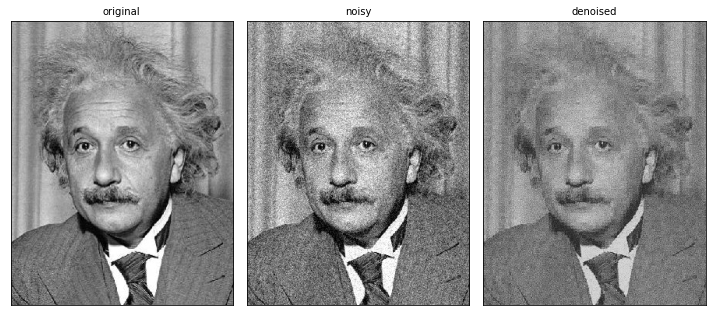

In [ ]:
sigma = np.median(abs(HH1))/0.6745  # I choose the finest scale
thresh = sigma*np.sqrt(2*np.log(len(noisyimg))) #define the threshold for filtering
for idx in range(1, len(ceofficients[1:])): # custome details H V D here
  ceofficients[idx] = tuple(pywt.threshold(ceofficients[idx], thresh, 'soft'))

# denoising
denoisedimg = pywt.waverec2(ceofficients, wavelet) # reconstruct the image to the original domain #

titles = ['original','noisy', 'denoised']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, a in enumerate([real, noisyimg, denoisedimg]):
    ax[i].imshow(a, cmap=plt.cm.gray)
    ax[i].set_title(titles[i], fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
# evaluate your try here
mse = skimage.metrics.mean_squared_error(real , denoisedimg)
print("MSE : " , mse)
psnr = skimage.metrics.peak_signal_noise_ratio(real , denoisedimg)
print("PSNR : " , psnr)
ssim = skimage.metrics.structural_similarity(real , denoisedimg)
print("SSIM : " , ssim)

MSE :  745.9471321028701
PSNR :  19.403723122821187
SSIM :  0.3255561892170788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  
